In [2]:
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


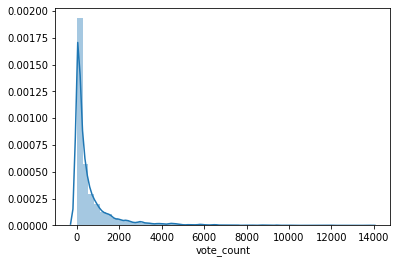

In [4]:
sns.distplot(df['vote_count'])

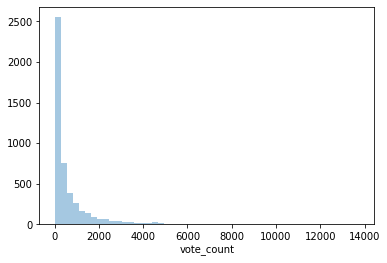

In [5]:
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

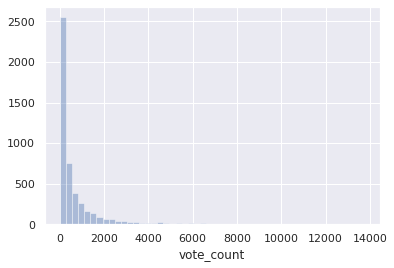

In [6]:
sns.set()
sns.distplot(df['vote_count'], norm_hist=False, kde=False)

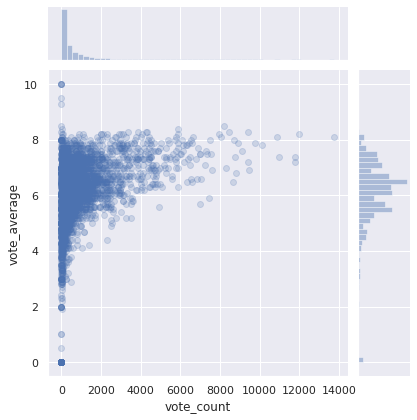

In [7]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

In [8]:
df = df[df['vote_count'] > 100]
len(df)

3150

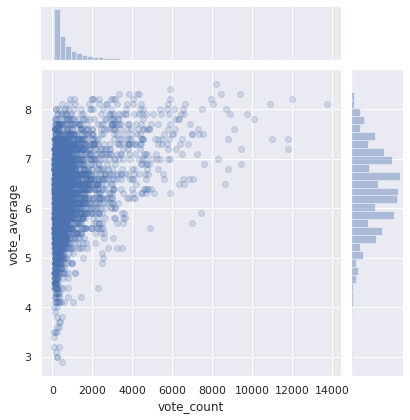

In [9]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

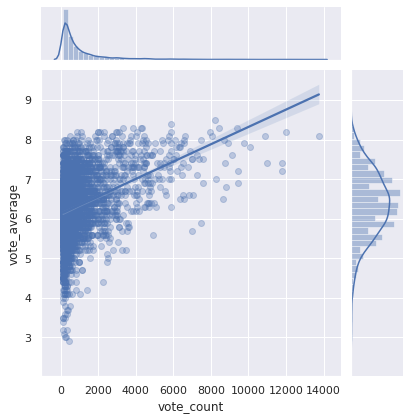

In [10]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg',
              joint_kws={'scatter_kws': {'alpha': 0.3}})

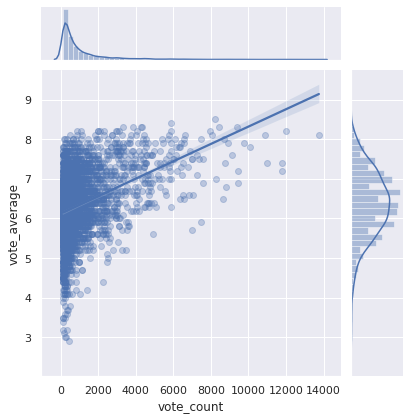

In [11]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg',
              joint_kws={'scatter_kws': dict(alpha=0.3)})

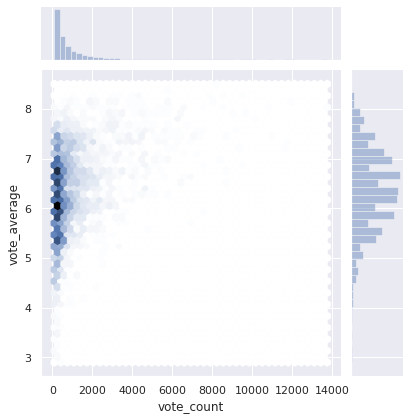

In [12]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='hex')

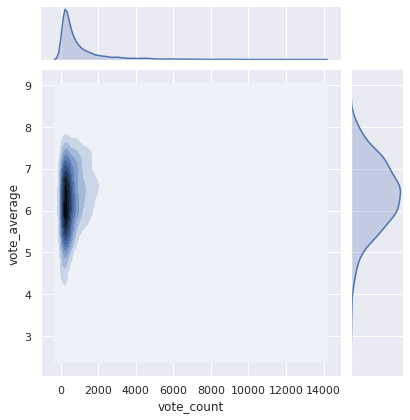

In [13]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

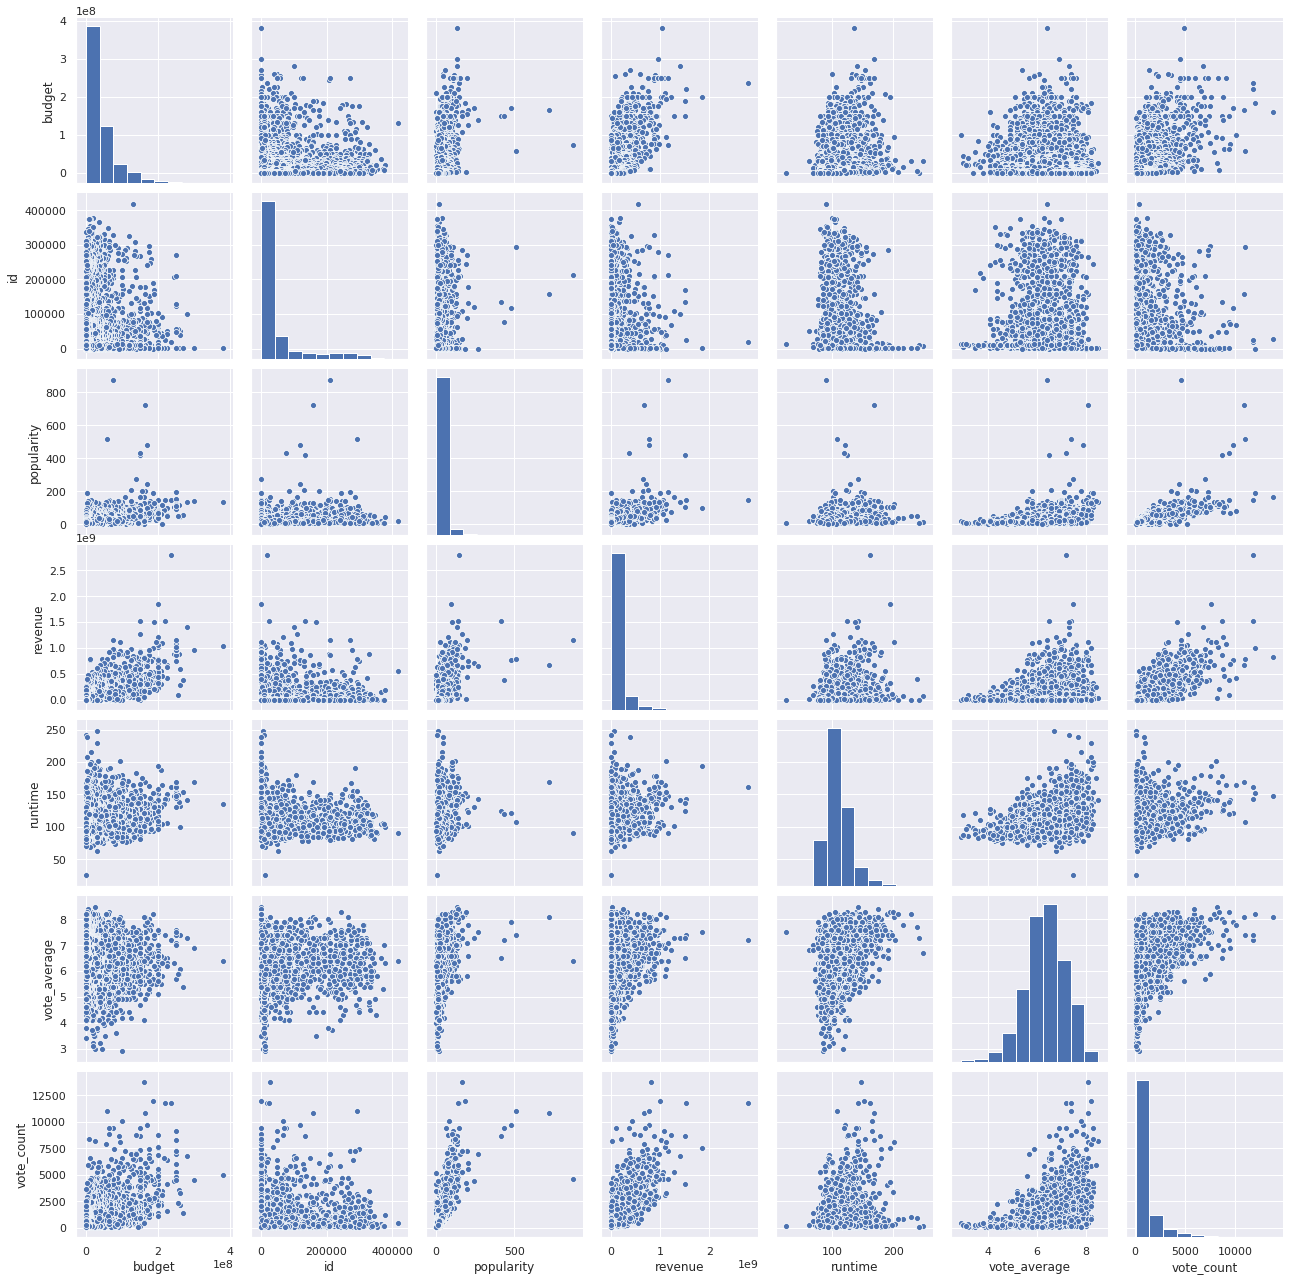

In [14]:
sns.pairplot(df)

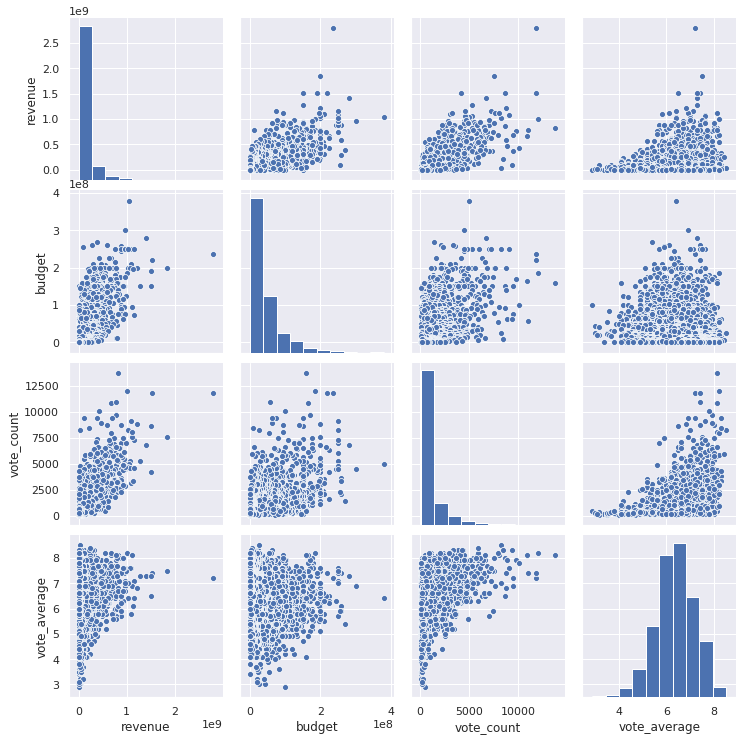

In [15]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

In [16]:
# vote averageが下位50%だったら、low、上位50%だったらhigh
df['evaluation'] = df.apply(lambda row: 'high' if row['vote_average'] > df['vote_average'].median() else 'low', axis=1)

In [17]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,low


In [18]:
vote_average_med = df['vote_average'].median()
df['evaluation_2'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_med else 'low')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,evaluation_2
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,high
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high,high
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,low,low


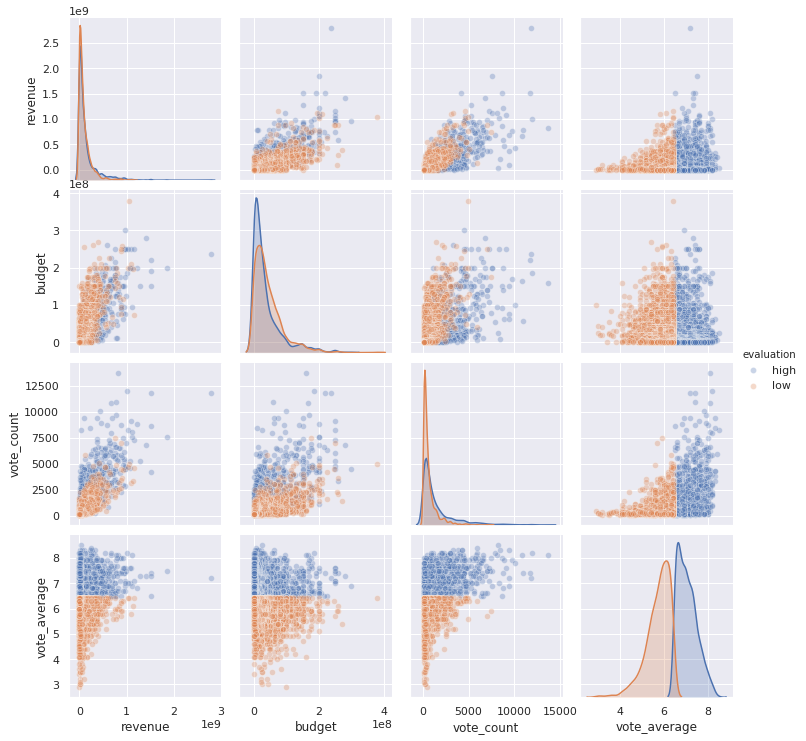

In [19]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation', plot_kws={'alpha':0.3})

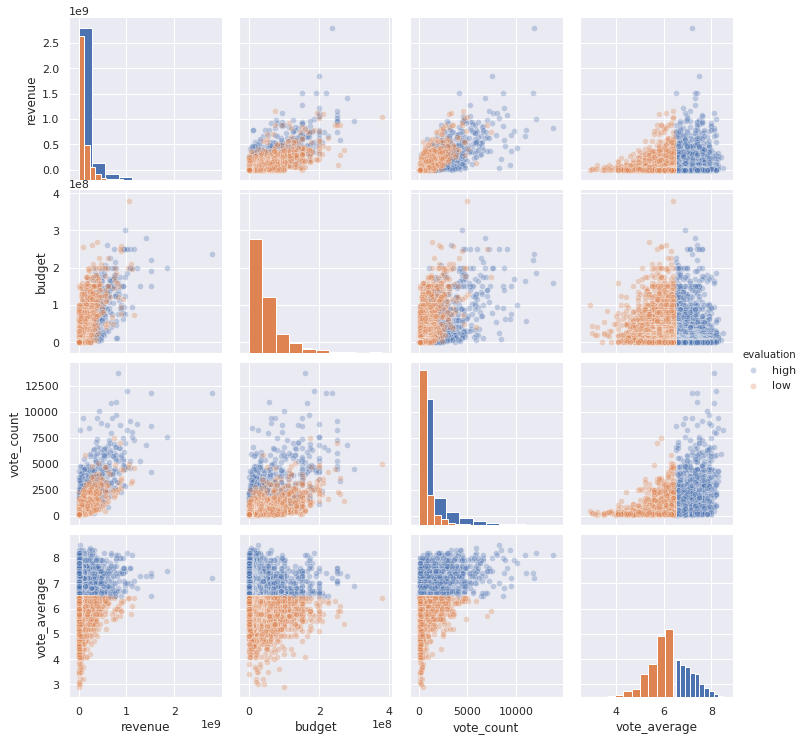

In [20]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation', plot_kws={'alpha':0.3}, diag_kind='hist')

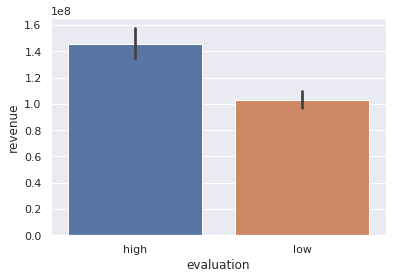

In [21]:
sns.barplot(x='evaluation', y='revenue', data=df)

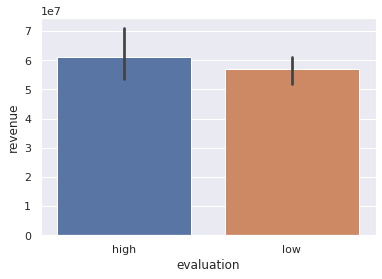

In [22]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

In [25]:
# df['year'] = df['']
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'evaluation', 'evaluation_2'],
      dtype='object')

In [33]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

In [34]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,evaluation_2,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,high,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high,high,2007


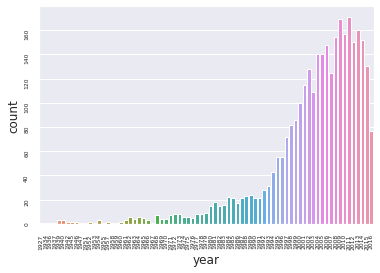

In [36]:
ax = sns.countplot(x='year', data=df)
ax.tick_params(rotation=90, labelsize=6)

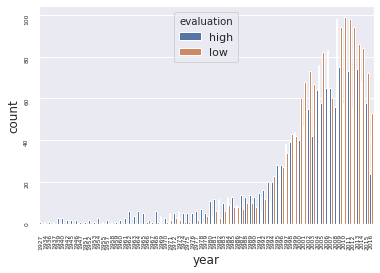

In [37]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

In [38]:
df['decade'] = df['year'].apply(lambda x: x[:3] + '0s')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,evaluation_2,year,decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,high,high,2009,2000s
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,high,high,2007,2000s


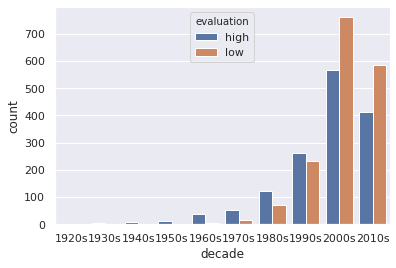

In [40]:
sns.countplot(x='decade', data=df.sort_values(by='decade'), hue='evaluation')

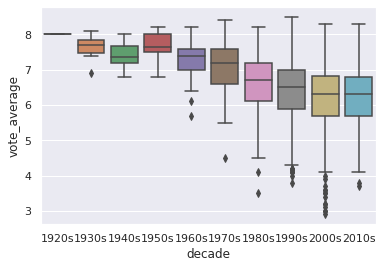

In [41]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values(by='decade'))

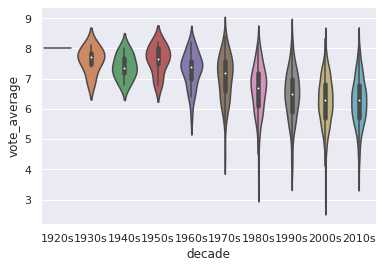

In [42]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values(by='decade'))

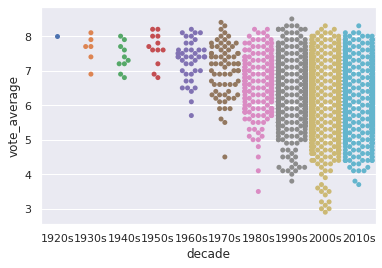

In [43]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values(by='decade'))

In [46]:
df[df['decade'] == '1920s']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,evaluation,evaluation_2,year,decade
2638,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657,high,high,1927,1920s


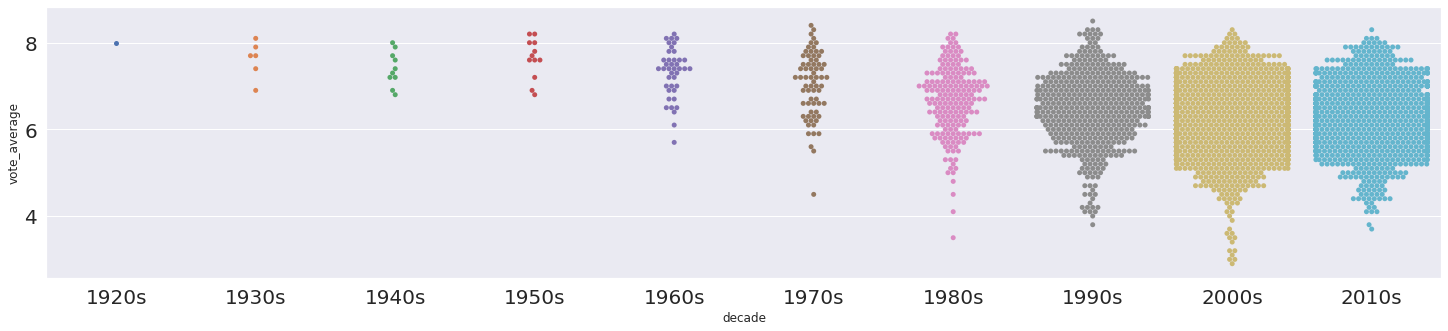

In [53]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.tick_params(labelsize=20)
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values(by='decade'))

In [54]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [55]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [59]:
df != 0

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4799,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
4800,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
4801,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


In [65]:
df = df[(df != 0).all(axis=1)]
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": "

In [66]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


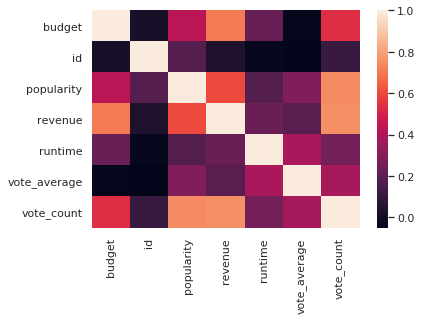

In [69]:
sns.heatmap(df.corr())

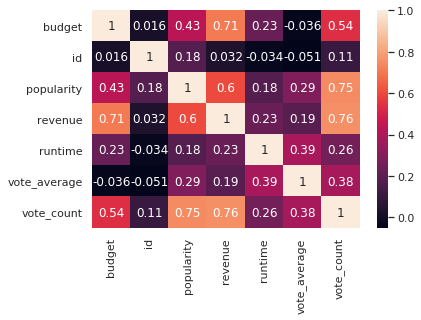

In [70]:
sns.heatmap(df.corr(), annot=True)

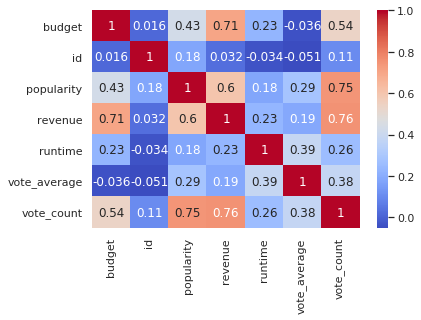

In [71]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [74]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])
df[['year', 'month']]

,year,month
0,2009,12
1,2007,05
2,2015,10
3,2012,07
4,2012,03
...,...,...
4773,1994,09
4788,1972,03
4792,1997,11
4796,2004,10


In [75]:
df.pivot_table(index='month', columns=['year'], values=df.groupby(by='year')['revenue'].mean())

KeyError: 8394751.0

In [83]:
values = df.groupby(by=['year', 'month'])['revenue'].mean()

year  month
1916  09       8.394751e+06
1925  11       2.200000e+07
1927  01       6.504220e+05
1929  02       4.358000e+06
1930  11       8.000000e+06
                   ...     
2016  05       2.747345e+08
      06       2.562691e+08
      07       1.703382e+08
      08       3.275855e+08
      09       1.586157e+07
Name: revenue, Length: 572, dtype: float64

In [86]:
df.groupby(by=['year', 'month'])[['revenue']].mean()

revenue
year month              
1916 09     8.394751e+06
1925 11     2.200000e+07
1927 01     6.504220e+05
1929 02     4.358000e+06
1930 11     8.000000e+06
...                  ...
2016 05     2.747345e+08
     06     2.562691e+08
     07     1.703382e+08
     08     3.275855e+08
     09     1.586157e+07

[572 rows x 1 columns]

In [90]:
revenue_df = df.groupby(by=['year', 'month'])[['revenue']].mean().pivot_table(index='month', columns='year', values='revenue')
revenue_df

year,1916,1925,1927,1929,1930,1932,1933,1934,1935,1936,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,,,,,,,,,,,,,
01,NaN,NaN,650422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.635086e+07,8.548517e+07,6.712600e+07,4.440869e+07,8.108325e+07,1.114278e+08,7.105923e+07,9.265205e+07,3.897096e+07,1.104857e+08
02,NaN,NaN,NaN,4358000.0,NaN,NaN,2240500.0,4500000.0,NaN,8500000.0,...,7.749721e+07,1.103606e+08,6.743382e+07,1.030667e+08,7.436204e+07,1.072104e+08,9.485649e+07,1.268837e+08,1.377840e+08,1.132806e+08
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.490862e+07,2.999256e+07,1.339757e+08,1.676966e+08,9.179089e+07,1.838416e+08,1.722818e+08,2.292273e+08,1.693319e+08,2.198517e+08
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.758093e+07,1.365654e+08,9.335484e+07,1.262502e+08,1.650838e+08,2.000062e+08,1.894902e+08,1.526641e+08,3.651596e+08,3.031371e+08
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.892281e+08,2.466259e+08,2.880007e+08,1.435772e+08,2.198116e+08,1.833446e+08,1.478546e+08,3.271891e+08,2.034467e+08,2.747345e+08
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486575e+08,2.470743e+08,2.012255e+08,2.247627e+08,2.986074e+08,2.625915e+08,3.484975e+08,3.533490e+08,4.528977e+08,2.562691e+08
07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.251360e+08,2.527264e+08,2.334799e+08,2.026511e+08,1.262491e+08,2.383139e+08,1.411227e+08,1.919401e+08,1.649625e+08,1.703382e+08
08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.963767e+07,5.439818e+07,9.607047e+07,1.271484e+08,8.856619e+07,7.244234e+07,1.068793e+08,1.328712e+08,7.813557e+07,3.275855e+08
09,8394751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3202000.0,NaN,...,5.993111e+07,4.608547e+07,4.362178e+07,7.367884e+07,5.038483e+07,9.054040e+07,8.997852e+07,6.541308e+07,1.508724e+08,1.586157e+07


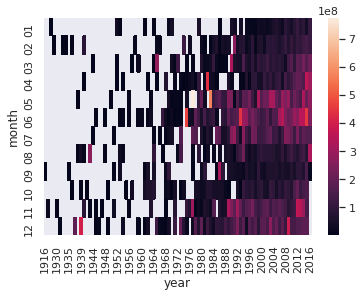

In [91]:
sns.heatmap(revenue_df)

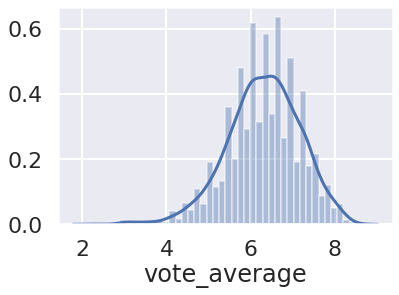

In [92]:
sns.set(context='poster')
sns.distplot(df['vote_average'])

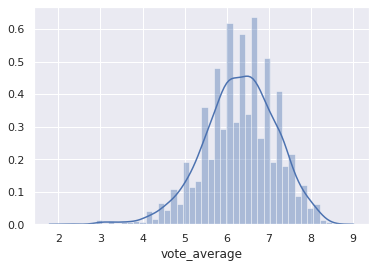

In [94]:
sns.set_context('notebook')
sns.distplot(df['vote_average'])

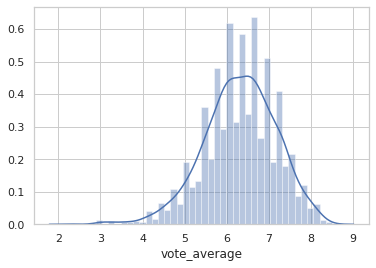

In [96]:
sns.set(context='notebook', style='whitegrid')
sns.distplot(df['vote_average'])

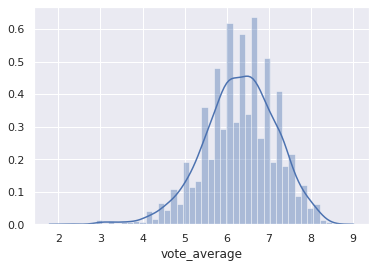

In [97]:
sns.set(style='darkgrid')
sns.distplot(df['vote_average'])

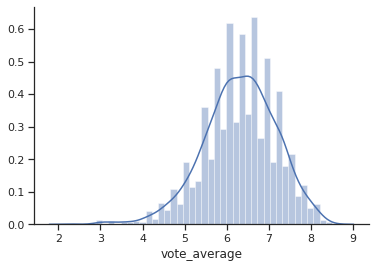

In [98]:
sns.set(style='ticks')
sns.distplot(df['vote_average'])
sns.despine()

In [99]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'year', 'month'],
      dtype='object')

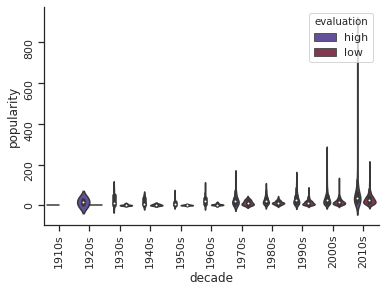

In [113]:
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')
vote_average_med = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > vote_average_med else 'low')

sns.set(context='notebook', style='ticks', palette='bright')
ax = sns.violinplot(x='decade', y='popularity', hue='evaluation', data=df.sort_values(by='decade'), palette='twilight')
sns.despine()
ax.tick_params(rotation=90)

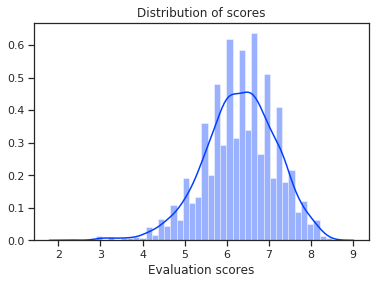

In [116]:
sns.distplot(df['vote_average'])
plt.title('Distribution of scores')
plt.xlabel('Evaluation scores')
plt.savefig('saved_seaborn.png')

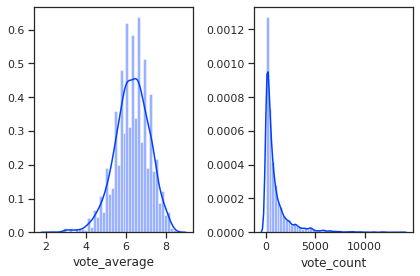

In [123]:
fig, axes = plt.subplots(1, 2)
sns.distplot(df['vote_average'], ax=axes[0])
sns.distplot(df['vote_count'], ax=axes[1])
fig.tight_layout()